# Menyiapkan direktori

In [1]:
import os
base_dir = "fit"
files = os.listdir(base_dir)
for file in files:
    print(file)

bahan
latih
testing
validasi


In [2]:
# menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
valid_dir = os.path.join(base_dir, 'validasi')
test_dir  = os.path.join(base_dir, 'testing')

In [3]:
# menentukan direktori isi bahan
gradeA_dir = os.path.join(bahan_dir, 'grade A/')
gradeB_dir = os.path.join(bahan_dir, 'grade B/')
gradeC_dir = os.path.join(bahan_dir, 'grade C/')

print("Jumlah data tiap kelas")
print("Jumlah gambar grade  A : ", len(os.listdir(gradeA_dir)))
print("Jumlah gambar grade  B : ", len(os.listdir(gradeB_dir)))
print("Jumlah gambar grade  C : ", len(os.listdir(gradeC_dir)))
print("Total dataset : ", len(os.listdir(gradeA_dir)) + len(os.listdir(gradeB_dir)) + len(os.listdir(gradeC_dir)))

Jumlah data tiap kelas
Jumlah gambar grade  A :  580
Jumlah gambar grade  B :  580
Jumlah gambar grade  C :  580
Total dataset :  1740


In [4]:
# direktori isi latih/training
train_gradeA = os.path.join(train_dir, 'grade A/')
train_gradeB = os.path.join(train_dir, 'grade B/')
train_gradeC = os.path.join(train_dir, 'grade C/')

# direktori isi validasi
valid_gradeA = os.path.join(valid_dir, 'grade A/')
valid_gradeB = os.path.join(valid_dir, 'grade B/')
valid_gradeC = os.path.join(valid_dir, 'grade C/')

# direktori isi testing
test_gradeA = os.path.join(test_dir, 'grade A/')
test_gradeB = os.path.join(test_dir, 'grade B/')
test_gradeC = os.path.join(test_dir, 'grade C/')

# Pembagian training, validasi dan testing

In [ ]:
import random
from shutil import copyfile

def train_val_test_split(source, train, valid, test, train_ratio, valid_ratio):
  # Menghitung total ukuran dataset
  total_size = len(os.listdir(source))

  # Menghitung ukuran data training dan testing
  train_size = int(train_ratio * total_size)
  valid_size = int(valid_ratio * total_size)
  test_size = total_size - train_size - valid_size

  # Randomize urutan dataset
  randomized = random.sample(os.listdir(source), total_size)
  
  # Memisahkan dataset menjadi data training, validasi, dan testing
  train_files = randomized[0:train_size]
  valid_files = randomized[train_size:train_size+valid_size]
  test_files = randomized[train_size+valid_size:total_size]

  # Meng-copy data training ke folder train_dir
  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  # Meng-copy data validasi ke folder valid_dir
  for i in valid_files:
    i_file = source + i
    destination = valid + i
    copyfile(i_file, destination)

  # Meng-copy data testing ke folder test_dir
  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

# Proporsi data training, validasi, dan testing
train_ratio = 0.9
val_ratio = 0.05

# Bagi data grade A
train_val_test_split(gradeA_dir, train_gradeA, valid_gradeA, test_gradeA, train_ratio, val_ratio)

# Bagi data grade B
train_val_test_split(gradeB_dir, train_gradeB, valid_gradeB, test_gradeB, train_ratio, val_ratio)

# Bagi data grade B
train_val_test_split(gradeC_dir, train_gradeC, valid_gradeC, test_gradeC, train_ratio, val_ratio)


In [5]:
print("Jumlah all grade A   : ", len(os.listdir(gradeA_dir)))
print("Jumlah train grade A : ", len(os.listdir(train_gradeA)))
print("Jumlah val grade A   : ", len(os.listdir(valid_gradeA)))
print("Jumlah test grade A  : ", len(os.listdir(test_gradeA)))

print("\nJumlah all grade B    : ", len(os.listdir(gradeB_dir)))
print("Jumlah train grade B  : ", len(os.listdir(train_gradeB)))
print("Jumlah val grade B    : ", len(os.listdir(valid_gradeB)))
print("Jumlah test grade B   : ", len(os.listdir(test_gradeB)))

print("\nJumlah all grade C    : ", len(os.listdir(gradeC_dir)))
print("Jumlah train grade C  : ", len(os.listdir(train_gradeC)))
print("Jumlah val grade C    : ", len(os.listdir(valid_gradeC)))
print("Jumlah test grade C   : ", len(os.listdir(test_gradeC)))

print("\nTotal training : ", len(os.listdir(train_gradeA)) + len(os.listdir(train_gradeB)) + len(os.listdir(train_gradeC)))
print("Total validasi : ", len(os.listdir(valid_gradeA)) + len(os.listdir(valid_gradeB)) + len(os.listdir(valid_gradeC)))
print("Total testing  : ", len(os.listdir(test_gradeA)) + len(os.listdir(test_gradeB)) + len(os.listdir(test_gradeC)))



Jumlah all grade A   :  580
Jumlah train grade A :  522
Jumlah val grade A   :  29
Jumlah test grade A  :  29

Jumlah all grade B    :  580
Jumlah train grade B  :  522
Jumlah val grade B    :  29
Jumlah test grade B   :  29

Jumlah all grade C    :  580
Jumlah train grade C  :  522
Jumlah val grade C    :  29
Jumlah test grade C   :  29

Total training :  1566
Total validasi :  87
Total testing  :  87


# Import Library yang dibutuhkan

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Conv2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Preprocessing dataset

In [7]:
train_datagen = ImageDataGenerator(
                rescale            = 1./255,
                rotation_range     = 30,
                horizontal_flip    = True,
                shear_range        = 0.3,
                fill_mode          = 'nearest',
)

val_datagen = ImageDataGenerator(
                rescale            = 1./255,
                rotation_range     = 30,
                horizontal_flip    = True,
                shear_range        = 0.3,
                fill_mode          = 'nearest',
)

test_datagen = ImageDataGenerator(
                rescale            = 1./255,
                rotation_range     = 30,
                horizontal_flip    = True,
                shear_range        = 0.3,
                fill_mode          = 'nearest',
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size  = 64,
    class_mode  = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size = (128,128),
    batch_size  = 64,
    shuffle     = False,
    class_mode  = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size  = 16,
    shuffle     = False,
    class_mode  = 'categorical'
)

Found 1566 images belonging to 3 classes.
Found 87 images belonging to 3 classes.
Found 87 images belonging to 3 classes.


In [9]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Menambahkan lapisan konvolusi tambahan
x = base_model.output
x = Conv2D(256, (2, 2), activation='relu')(x)
x = Conv2D(128, (2, 2), activation='relu')(x)
x = GlobalAveragePooling2D()(x)
output = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Define the optimizer with a lower learning rate
opt = Adam(lr=1e-4)

# Compile the model
model.compile(optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [10]:
# train the model
history = model.fit(
                    train_generator,
                    epochs= 50,
                    validation_data=val_generator,
                  )

Epoch 1/50
25/25 [==============================] - 19s 597ms/step - loss: 1.0674 - accuracy: 0.6769 - val_loss: 0.3989 - val_accuracy: 0.8966
Epoch 2/50
25/25 [==============================] - 14s 543ms/step - loss: 0.3764 - accuracy: 0.8493 - val_loss: 0.3857 - val_accuracy: 0.8621
Epoch 3/50
25/25 [==============================] - 14s 536ms/step - loss: 0.3005 - accuracy: 0.8876 - val_loss: 0.1970 - val_accuracy: 0.9310
Epoch 4/50
25/25 [==============================] - 14s 546ms/step - loss: 0.2165 - accuracy: 0.9285 - val_loss: 0.2474 - val_accuracy: 0.8851
Epoch 5/50
25/25 [==============================] - 14s 556ms/step - loss: 0.1836 - accuracy: 0.9368 - val_loss: 0.1934 - val_accuracy: 0.9195
Epoch 6/50
25/25 [==============================] - 14s 539ms/step - loss: 0.1964 - accuracy: 0.9330 - val_loss: 0.1558 - val_accuracy: 0.9310
Epoch 7/50
25/25 [==============================] - 14s 547ms/step - loss: 0.1689 - accuracy: 0.9400 - val_loss: 0.1898 - val_accuracy: 0.9195

In [11]:
model.save('model_lele11_fit_128_datagenerator_50epoch.h5')

# Klasifikasi Report

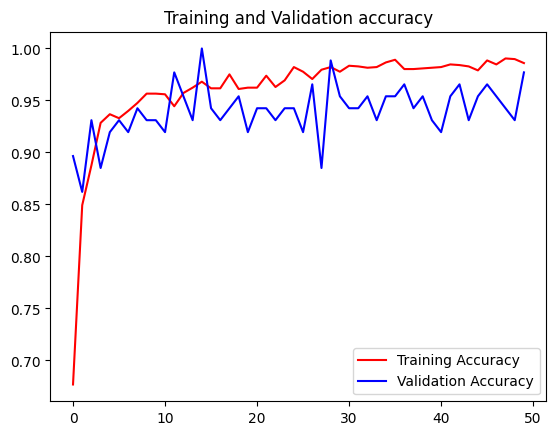

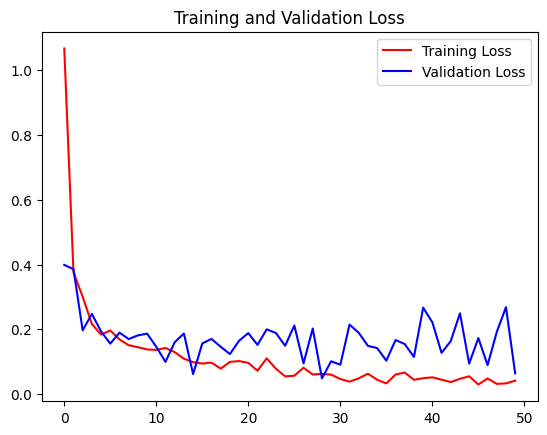

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.show()

2/2 [==============================] - 1s 191ms/step


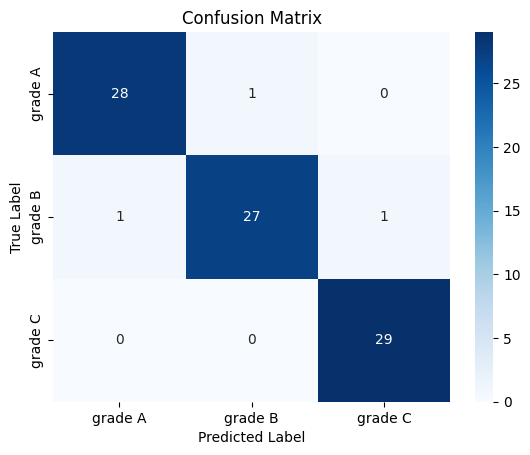

In [25]:
class_list = os.listdir(train_dir)

# membuat prediksi pada data validasi
y_pred = model.predict(val_generator)
Y_pred = np.argmax(y_pred, axis=1)

# mengambil label yang sebenarnya
y_true = val_generator.classes

# membuat confusion matrix
cm = confusion_matrix(y_true, Y_pred)

# menampilkan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_list, yticklabels=class_list)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
# Evaluasi model
y_true = val_generator.classes
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Tampilkan laporan klasifikasi
target_names = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

2/2 [==============================] - 1s 128ms/step
              precision    recall  f1-score   support

     grade A       0.97      0.97      0.97        29
     grade B       0.96      0.93      0.95        29
     grade C       0.97      1.00      0.98        29

    accuracy                           0.97        87
   macro avg       0.97      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87



# Pengujian Model

6/6 [==============================] - 1s 79ms/step


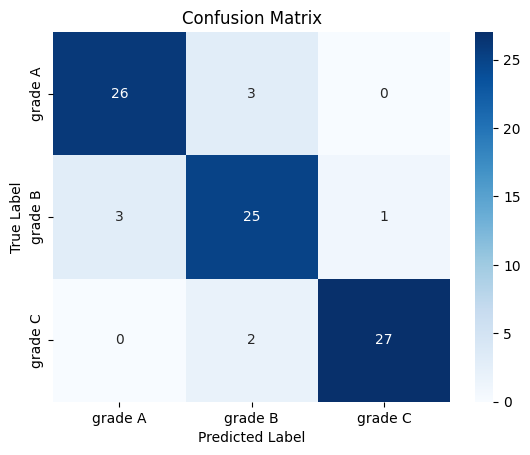

In [27]:
class_list = os.listdir(train_dir)

# membuat prediksi pada data validasi
y_pred = model.predict(test_generator)
Y_pred = np.argmax(y_pred, axis=1)

# mengambil label yang sebenarnya
y_true = test_generator.classes

# membuat confusion matrix
cm = confusion_matrix(y_true, Y_pred)

# menampilkan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_list, yticklabels=class_list)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluasi model
y_true = test_generator.classes
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Tampilkan laporan klasifikasi
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

6/6 [==============================] - 1s 91ms/step
              precision    recall  f1-score   support

     grade A       0.97      0.97      0.97        29
     grade B       0.93      0.90      0.91        29
     grade C       0.93      0.97      0.95        29

    accuracy                           0.94        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.94      0.94      0.94        87



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the class labels
class_labels = ['grade A', 'grade B', 'grade C']

# Set the directory of the images to be predicted
img_dir = 'fit/testing/grade B/'

# Get the list of image files in the directory
img_files = os.listdir(img_dir)

# Create empty lists to store the predicted classes and probabilities for all images
predicted_classes = []
probabilities = []

# Loop over the image files and make predictions on each image
for img_file in img_files:
    # Load the image to be predicted
    img_path = os.path.join(img_dir, img_file)
    img = image.load_img(img_path, target_size=(128, 128))

    # Preprocess the image
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    # Make predictions on the image
    prediction = model.predict(img)

    # Get the predicted class and probability
    predicted_class = np.argmax(prediction)
    probability = prediction[0][predicted_class]

    # Add the predicted class and probability to the lists
    predicted_classes.append(predicted_class)
    probabilities.append(probability)

# Count the number of images for each predicted class
count_classes = [predicted_classes.count(i) for i in range(len(class_labels))]

# Calculate the percentage of images for each predicted class
percent_classes = [round(count_classes[i]/len(predicted_classes)*100, 2) for i in range(len(class_labels))]

# Create a bar chart of the predicted classes and their percentages
plt.bar(class_labels, percent_classes)

# Add labels and title to the chart
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Prediction for all images')

# Display the chart
plt.show()

# Print the number of images and their predicted classes and probabilities
for i, img_file in enumerate(img_files):
    print('Image:', img_file)
    print('Predicted class:', class_labels[predicted_classes[i]])
    print('Probability:', round(probabilities[i]*100, 2), '%')
    print()

In [1]:
import tensorflow as tf

#load h5 module
model=tf.keras.models.load_model('model_lele11_fit_128_datagenerator_50epoch.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

#convert
tflite_model = tflite_converter.convert()
open("model_lele11_fit_128_datagenerator_50epoch.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HOSNOL~1\AppData\Local\Temp\tmpenytjhub\assets


INFO:tensorflow:Assets written to: C:\Users\HOSNOL~1\AppData\Local\Temp\tmpenytjhub\assets


14628872

In [ ]:
import tensorflow as tf

# Muat model Keras (.h5)
model = tf.keras.models.load_model('model_lele6_imageDataGeneror.h5')

# Konversi model Keras ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_model = converter.convert()

# Simpan model TFLite
with open('model_lele6_imageDataGeneror.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
import tensorflow as tf

def representative_dataset():
  for i in range(100):
        batch_data, _ = train_generator.next()
        yield [tf.dtypes.cast(batch_data, tf.float32)]

# Convert the tflite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter.convert()

# Save the model.
with open('model_lele7_penyesuaianData.tflite', 'wb') as f:
  f.write(tflite_quant_model)

In [ ]:
def representative_dataset():
  for i in range(100):
        batch_data, _ = train_generator.next()
        yield [tf.dtypes.cast(batch_data, tf.float32)]
    
for batch_data in representative_dataset():
    print(batch_data)

In [ ]:
import os

# Dapatkan ukuran file TFLite
file_size = os.path.getsize('model_lele6_imageDataGeneror.tflite')
print(f'Ukuran file TFLite: {file_size} bytes')


In [ ]:
# Path file model TFLite
model_path = 'model_lele.tflite'

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get informasi model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:")
print(input_details)
print("\nOutput Details:")
print(output_details)